<a href="https://colab.research.google.com/github/jamesphare/website/blob/master/content/post/2021-06-11-python/2021_05_18_ask_a_manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load data
survey = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-18/survey.csv')

In [218]:
survey.describe()

,annual_salary,other_monetary_comp
count,2.623200e+04,1.944700e+04
mean,1.457254e+05,1.848935e+04
std,5.543526e+06,8.616672e+05
min,0.000000e+00,0.000000e+00
25%,5.400000e+04,0.000000e+00
50%,7.600000e+04,2.000000e+03
75%,1.100000e+05,1.000000e+04
max,8.700000e+08,1.200000e+08


In [219]:
survey

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,5/17/2021 17:42:33,25-34,Media & Digital,Senior Reporter,Trade publication,85000,2000.0,USD,NaN,NaN,USA,New York,New York City,5-7 years,5-7 years,College degree,Woman,White
26228,5/17/2021 17:46:38,35-44,Nonprofits,Production and Workflow Manager,NaN,40000,NaN,USD,NaN,NaN,USA,Pennsylvania,Pittsburgh,11 - 20 years,2 - 4 years,College degree,Woman,Asian or Asian American
26229,5/17/2021 17:47:30,25-34,Computing or Tech,Chief of Staff,NaN,148000,29000.0,USD,NaN,NaN,USA,California,Bay Area,11 - 20 years,11 - 20 years,Master's degree,Woman,White
26230,5/17/2021 18:20:07,25-34,"Marketing, Advertising & PR",Digital Marketing Manager,"Small agency. I manage a team of ~15 people, b...",65000,5000.0,USD,NaN,NaN,United States,Washington,Seattle,2 - 4 years,2 - 4 years,College degree,Woman,White


In [220]:
#compute total compensation
survey['total_comp'] = survey['annual_salary'] + survey['other_monetary_comp']
survey.describe()

,annual_salary,other_monetary_comp,total_comp
count,2.623200e+04,1.944700e+04,1.944700e+04
mean,1.457254e+05,1.848935e+04,1.649025e+05
std,5.543526e+06,8.616672e+05,7.113644e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.400000e+04,0.000000e+00,5.800000e+04
50%,7.600000e+04,2.000000e+03,8.300000e+04
75%,1.100000e+05,1.000000e+04,1.230000e+05
max,8.700000e+08,1.200000e+08,9.900000e+08


In [221]:
#let's look at the data by race and gender
survey.pivot_table("total_comp", "gender", "race", margins=True)

race,Another option not listed here or prefer not to answer,Asian or Asian American,"Asian or Asian American, Another option not listed here or prefer not to answer","Asian or Asian American, Black or African American","Asian or Asian American, Black or African American, White","Asian or Asian American, Hispanic, Latino, or Spanish origin","Asian or Asian American, Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer","Asian or Asian American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White","Asian or Asian American, Hispanic, Latino, or Spanish origin, White","Asian or Asian American, Middle Eastern or Northern African","Asian or Asian American, Middle Eastern or Northern African, White","Asian or Asian American, Native American or Alaska Native","Asian or Asian American, Native American or Alaska Native, White","Asian or Asian American, White","Asian or Asian American, White, Another option not listed here or prefer not to answer",Black or African American,"Black or African American, Another option not listed here or prefer not to answer","Black or African American, Hispanic, Latino, or Spanish origin","Black or African American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White","Black or African American, Hispanic, Latino, or Spanish origin, White","Black or African American, Middle Eastern or Northern African","Black or African American, Middle Eastern or Northern African, White","Black or African American, Native American or Alaska Native, White","Black or African American, White","Hispanic, Latino, or Spanish origin","Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer","Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White","Hispanic, Latino, or Spanish origin, Native American or Alaska Native","Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White","Hispanic, Latino, or Spanish origin, White","Hispanic, Latino, or Spanish origin, White, Another option not listed here or prefer not to answer",Middle Eastern or Northern African,"Middle Eastern or Northern African, Native American or Alaska Native, White","Middle Eastern or Northern African, White","Middle Eastern or Northern African, White, Another option not listed here or prefer not to answer",Native American or Alaska Native,"Native American or Alaska Native, Another option not listed here or prefer not to answer","Native American or Alaska Native, White","Native American or Alaska Native, White, Another option not listed here or prefer not to answer",White,"White, Another option not listed here or prefer not to answer",All
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Man,197572.536232,301655.814607,446466.666667,114000.0,NaN,132520.000000,NaN,NaN,NaN,250000.000000,NaN,NaN,NaN,171981.255814,137000.0,117706.920000,NaN,102300.000000,NaN,153000.0,166000.0,NaN,NaN,146660.000000,1.157999e+05,NaN,NaN,474000.000000,248000.000000,104611.039216,NaN,187346.153846,NaN,159442.857143,154000.0,95912.0000,NaN,164358.461538,NaN,159486.501931,88487.500000,164937.542733
Non-binary,523000.000000,151752.400000,NaN,50000.0,NaN,NaN,NaN,NaN,62390.000000,NaN,NaN,NaN,NaN,64195.454545,NaN,97807.375000,NaN,NaN,58440.000000,NaN,NaN,NaN,NaN,67565.000000,4.207800e+04,NaN,NaN,NaN,NaN,87142.583333,85000.0,35000.000000,NaN,166333.333333,NaN,142800.0000,NaN,81050.000000,NaN,87678.855696,71500.000000,96110.593814
Other or prefer not to answer,121870.056180,246091.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000e+06,NaN,NaN,NaN,NaN,113500.000000,NaN,NaN,NaN,722000.000000,NaN,NaN,NaN,161000.000000,NaN,91265.956522,43700.000000,134608.970149
Prefer not to answer,88010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88010.000000
Woman,128203.

In [222]:
#How did respondants break down by gender? Overwhelmingly women! This data might
#not be most helpful for seeing trends here
survey.groupby("gender").count()

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,race,total_comp
gender,,,,,,,,,,,,,,,,,,
Man,4743,4743,4738,4743,1001,4743,3688,4743,45,476,4743,3651,4730,4743,4743,4709,4722,3688
Non-binary,713,713,713,713,241,713,486,713,3,102,713,568,712,713,713,711,712,486
Other or prefer not to answer,268,268,267,268,74,268,204,268,4,30,268,213,267,268,268,264,262,204
Prefer not to answer,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1
Woman,20359,20359,20306,20359,5417,20359,14973,20359,114,2253,20359,16996,20296,20359,20359,20233,20286,14973


In [223]:
#How did respondants break down by race? Even whiter!
survey.groupby("race").count()

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,total_comp
race,,,,,,,,,,,,,,,,,,
Another option not listed here or prefer not to answer,566,566,564,566,124,566,423,566,14,75,566,412,563,566,566,554,564,423
Asian or Asian American,1217,1217,1210,1217,264,1217,853,1217,29,132,1217,962,1217,1217,1217,1209,1209,853
"Asian or Asian American, Another option not listed here or prefer not to answer",11,11,11,11,4,11,11,11,2,4,11,5,11,11,11,11,11,11
"Asian or Asian American, Black or African American",7,7,7,7,2,7,5,7,0,1,7,7,7,7,7,7,7,5
"Asian or Asian American, Black or African American, Hispanic, Latino, or Spanish origin",1,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,0
"Asian or Asian American, Black or African American, Native American or Alaska Native, White",1,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,0
"Asian or Asian American, Black or African American, White",5,5,5,5,1,5,5,5,0,0,5,4,5,5,5,5,5,5
"Asian or Asian American, Hispanic, Latino, or Spanish origin",11,11,11,11,3,11,8,11,0,1,11,11,11,11,11,11,11,8
"Asian or Asian American, Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer",1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1


In [224]:
#Are other categories more evenly distributed? Like experience?
survey.groupby("overall_years_of_professional_experience").count()

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,years_of_experience_in_field,highest_level_of_education_completed,gender,race,total_comp
overall_years_of_professional_experience,,,,,,,,,,,,,,,,,,
1 year or less,431,431,429,431,100,431,284,431,3,46,431,342,431,431,425,427,423,284
11 - 20 years,9139,9139,9121,9139,2305,9139,6905,9139,50,980,9139,7609,9105,9139,9065,9096,9101,6905
2 - 4 years,2700,2700,2695,2700,650,2700,1881,2700,33,281,2700,2154,2692,2700,2680,2680,2672,1881
21 - 30 years,3470,3470,3455,3470,913,3470,2699,3470,18,390,3470,2877,3463,3470,3456,3450,3461,2699
31 - 40 years,821,821,819,821,240,821,656,821,7,104,821,690,819,821,817,814,818,656
41 years or more,115,115,115,115,24,115,99,115,0,11,115,103,115,115,115,115,115,99
5-7 years,4515,4515,4503,4515,1214,4515,3245,4515,29,497,4515,3647,4502,4515,4479,4492,4488,3245
8 - 10 years,5041,5041,5036,5041,1317,5041,3678,5041,26,563,5041,4123,5027,5041,4999,5010,5008,3678


In [225]:
#Or industry experience?
survey.groupby("years_of_experience_in_field").count()

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,highest_level_of_education_completed,gender,race,total_comp
years_of_experience_in_field,,,,,,,,,,,,,,,,,,
1 year or less,1249,1249,1244,1249,310,1249,828,1249,10,159,1249,981,1245,1249,1237,1242,1235,828
11 - 20 years,6245,6245,6229,6245,1596,6245,4781,6245,32,665,6245,5181,6223,6245,6195,6218,6220,4781
2 - 4 years,5737,5737,5728,5737,1455,5737,4059,5737,54,611,5737,4568,5720,5737,5695,5708,5693,4059
21 - 30 years,1782,1782,1778,1782,456,1782,1436,1782,13,217,1782,1482,1779,1782,1777,1772,1779,1436
31 - 40 years,366,366,364,366,88,366,293,366,0,34,366,320,365,366,366,361,365,293
41 years or more,38,38,38,38,5,38,31,38,0,3,38,32,38,38,38,38,38,31
5-7 years,6114,6114,6102,6114,1611,6114,4535,6114,35,659,6114,5054,6098,6114,6065,6075,6082,4535
8 - 10 years,4701,4701,4690,4701,1242,4701,3484,4701,22,524,4701,3927,4686,4701,4663,4670,4674,3484


In [226]:
#Age? We're definitely seeing a youngish and somewhat less experienced skew
survey.groupby("how_old_are_you").count()

,timestamp,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race,total_comp
how_old_are_you,,,,,,,,,,,,,,,,,,
18-24,1015,1012,1015,268,1015,701,1015,9,116,1015,818,1014,1015,1015,1001,1006,1002,701
25-34,11748,11726,11748,3006,11748,8488,11748,81,1301,11748,9508,11710,11748,11748,11663,11684,11665,8488
35-44,9398,9378,9398,2419,9398,7097,9398,47,998,9398,7789,9369,9398,9398,9324,9349,9357,7097
45-54,3042,3033,3042,785,3042,2347,3042,24,349,3042,2530,3033,3042,3042,3026,3025,3038,2347
55-64,931,926,931,256,931,731,931,5,95,931,810,930,931,931,925,922,926,731
65 or over,88,88,88,27,88,76,88,0,12,88,81,88,88,88,88,88,88,76
under 18,10,10,10,2,10,7,10,0,1,10,9,10,10,10,9,10,10,7


In [227]:
#Education - a disproportionately formally educated group
survey.groupby("highest_level_of_education_completed").count()

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,gender,race,total_comp
highest_level_of_education_completed,,,,,,,,,,,,,,,,,,
College degree,12584,12584,12557,12584,3126,12584,9401,12584,78,1349,12584,10445,12558,12584,12584,12542,12535,9401
High School,568,568,563,568,126,568,415,568,11,62,568,355,565,568,568,565,565,415
Master's degree,8387,8387,8372,8387,2221,8387,6115,8387,44,888,8387,7016,8352,8387,8387,8340,8348,6115
PhD,1356,1356,1354,1356,382,1356,1035,1356,9,172,1356,1057,1347,1356,1356,1344,1347,1035
"Professional degree (MD, JD, etc.)",1261,1261,1260,1261,394,1261,956,1261,7,170,1261,1077,1260,1261,1261,1251,1253,956
Some college,1880,1880,1873,1880,475,1880,1413,1880,15,213,1880,1468,1876,1880,1880,1876,1876,1413


In [228]:
#Country? This data is seriously messy
survey.country.unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada', 'usa',
       'UK', 'Scotland', 'U.S.', 'The Netherlands', 'Australia', 'Spain',
       'us', 'Usa', 'England', 'finland', 'United States of America',
       'France', 'United states', 'Germany', 'united states', 'Ireland',
       'India', 'Uk', 'canada', 'U.S>', 'ISA', 'Argentina',
       'Great Britain', 'United State', 'U.S.A', 'Denmark', 'U.S.A.',
       'America', 'Netherlands', 'netherlands',
       'united states of america', 'Switzerland', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Malaysia',
       'Mexico', 'United Stated', 'South Africa', 'Belgium',
       'Northern Ireland', 'u.s.', 'UNITED STATES', 'united States',
       'Sweden', 'Hong Kong', 'Kuwait', 'Norway', 'Sri lanka',
       'Contracts', 'USA-- Virgin Islands', 'United Statws', 'England/UK',
       'U.S',
       "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I 

In [229]:
#State? Again, looking pretty messy
survey.state.unique()

array(['Massachusetts', nan, 'Tennessee', 'Wisconsin', 'South Carolina',
       'New Hampshire', 'Arizona', 'Missouri', 'Florida', 'Pennsylvania',
       'Michigan', 'Minnesota', 'Illinois', 'California', 'Georgia',
       'Ohio', 'District of Columbia', 'Maryland', 'Texas', 'Virginia',
       'North Carolina', 'New York', 'New Jersey', 'Rhode Island',
       'Colorado', 'Oregon', 'Washington', 'Indiana', 'Iowa', 'Nebraska',
       'Oklahoma', 'Maine', 'Connecticut', 'South Dakota',
       'West Virginia', 'Idaho', 'Louisiana', 'Montana', 'Kentucky',
       'North Dakota', 'Kansas', 'Vermont', 'Arkansas', 'Alabama',
       'Nevada', 'Delaware', 'New Mexico', 'Hawaii', 'Utah',
       'Mississippi', 'Kentucky, Ohio', 'District of Columbia, Virginia',
       'District of Columbia, Maryland', 'Alaska', 'Arizona, Washington',
       'Georgia, New York', 'California, Colorado', 'California, Oregon',
       'District of Columbia, Maryland, Pennsylvania, Virginia',
       'Arizona, California'

In [230]:
#Industry? More than a thousand categories!
survey.groupby("industry").count()

,timestamp,how_old_are_you,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race,total_comp
industry,,,,,,,,,,,,,,,,,,
"""Government Relations"" (Lobbying)",1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
Academia,5,5,5,1,5,4,5,0,1,5,0,5,5,5,5,5,5,4
Academia - STEM,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,0
Academia / Research,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
Academia--cell and molecular biology,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trade association/membership,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
translation,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,1,0
veterinary biotech,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [231]:
#Job title? More than 12,000 titles!
survey.groupby("job_title").count()

,timestamp,how_old_are_you,industry,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race,total_comp
job_title,,,,,,,,,,,,,,,,,,
"""mum"" ;)",1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
(Electronics) Hardware engineer,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
(Environmental) Planner,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
(Hotel) Sales Manager,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
(State Agency) Legislative Director,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web Application Developer,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,0
web developer,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,0
workers comp case manager,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1


In [232]:
#It looks like age, experience, and education are the fields where there's some
#hope of finding patterns that aren't simply noise. Let's look at these categories 
#one at a time

#Age - these are some high salaries!

survey.groupby("how_old_are_you").mean()

,annual_salary,other_monetary_comp,total_comp
how_old_are_you,,,
18-24,5.953666e+04,7232.054208,6.971570e+04
25-34,1.192027e+05,10427.510839,1.029231e+05
35-44,1.136722e+05,15249.714245,1.302016e+05
45-54,1.053925e+05,12957.204090,1.212525e+05
55-64,1.035250e+06,173762.783858,1.460418e+06
65 or over,9.545331e+04,4002.789474,9.910249e+04
under 18,7.333920e+04,3057.142857,9.430743e+04


In [233]:
#I wonder if the median is similar - still much higher than national averages but
#probably much more representative than the mean

survey.groupby("how_old_are_you").median()

,annual_salary,other_monetary_comp,total_comp
how_old_are_you,,,
18-24,51500,1500.0,58000.0
25-34,70000,1800.0,75000.0
35-44,84652,2000.0,92000.0
45-54,88000,2000.0,96000.0
55-64,83000,1000.0,89800.0
65 or over,91250,0.0,91500.0
under 18,39660,1200.0,109200.0


In [234]:
#Overall Experience
survey.groupby("overall_years_of_professional_experience").median()

,annual_salary,other_monetary_comp,total_comp
overall_years_of_professional_experience,,,
1 year or less,55000.0,1100.0,60000.0
11 - 20 years,84000.0,2000.0,91375.0
2 - 4 years,59806.5,1500.0,65000.0
21 - 30 years,90000.0,2500.0,98000.0
31 - 40 years,90000.0,1000.0,96000.0
41 years or more,90000.0,2000.0,98000.0
5-7 years,67000.0,1500.0,73000.0
8 - 10 years,75000.0,1950.0,81000.0


In [235]:
#Experience in field
survey.groupby("years_of_experience_in_field").median()

,annual_salary,other_monetary_comp,total_comp
years_of_experience_in_field,,,
1 year or less,53000,1000.0,57000.0
11 - 20 years,91000,2500.0,100000.0
2 - 4 years,61800,1200.0,66850.0
21 - 30 years,100100,3000.0,110000.0
31 - 40 years,100000,1000.0,108000.0
41 years or more,104398,600.0,100796.0
5-7 years,72000,2000.0,77770.0
8 - 10 years,82000,2000.0,89767.0


In [236]:
#Education
survey.groupby("highest_level_of_education_completed").median()

,annual_salary,other_monetary_comp,total_comp
highest_level_of_education_completed,,,
College degree,73000,2000.0,80000.0
High School,60000,2000.0,64880.0
Master's degree,78640,1000.0,85000.0
PhD,92000,1200.0,101000.0
"Professional degree (MD, JD, etc.)",113000,5000.0,126807.0
Some college,61000,2000.0,66200.0


In [237]:
#Education and years of experience in a field seem to pay off most dramatically
#I wonder how they relate to each other

#Make formatting consistent and ready for display
survey.loc[survey['highest_level_of_education_completed'] == "Professional degree (MD, JD, etc.)", 
           "highest_level_of_education_completed"] = "Professional degree"
survey.loc[survey['years_of_experience_in_field'] == "5-7 years", 
           "years_of_experience_in_field"] = "5 - 7 years"

pvt = survey.pivot_table("total_comp", 
                   "years_of_experience_in_field", 
                   "highest_level_of_education_completed",
                   aggfunc = "median")
pvt = pvt[["High School", "Some college", "College degree", "Master's degree", "PhD",
     "Professional degree"]]
pvt = pvt.reindex(["41 years or more", "31 - 40 years", "21 - 30 years", "11 - 20 years",
             "8 - 10 years", "5 - 7 years", "2 - 4 years", "1 year or less"])
pvt

highest_level_of_education_completed,High School,Some college,College degree,Master's degree,PhD,Professional degree
years_of_experience_in_field,,,,,,
41 years or more,90000.0,109000.0,90908.0,128250.0,NaN,NaN
31 - 40 years,107000.0,78000.0,100000.0,116500.0,171500.0,150000.0
21 - 30 years,106500.0,97000.0,109000.0,114400.0,121100.0,150000.0
11 - 20 years,75000.0,80300.0,101000.0,100000.0,102000.0,150000.0
8 - 10 years,68250.0,70000.0,89000.0,86500.0,102000.0,127000.0
5 - 7 years,55000.0,64360.0,75000.0,78000.0,97500.0,125000.0
2 - 4 years,45000.0,50000.0,65000.0,68000.0,97000.0,93500.0
1 year or less,41000.0,39700.0,55500.0,60000.0,89250.0,71000.0


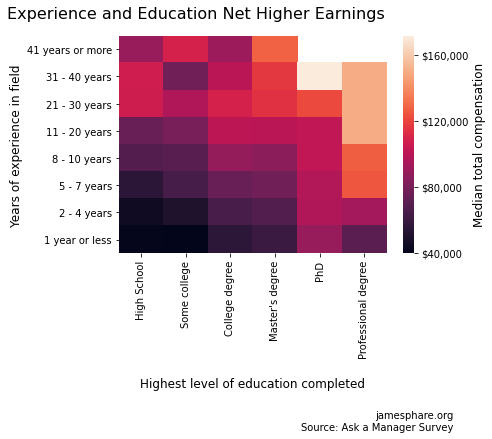

In [298]:
#draw the heat map
hmap = sns.heatmap(pvt)
hmap.text(-2.5, 0, "Experience and Education Net Higher Earnings\n", 
          size=16, 
          ha = 'left')
hmap.set_xlabel("\nHighest level of education completed", 
                size = 12)
hmap.set_ylabel("Years of experience in field", 
                size = 12)
hmap.text(7.5, 14.5, "jamesphare.org\nSource: Ask a Manager Survey", 
          ha='right',
          size=10)
hmap.collections[0].colorbar.set_label("Median total compensation",
                                       size=12)
hmap.collections[0].colorbar.set_ticks(ticks=[40000, 80000, 120000, 160000])
hmap.collections[0].colorbar.set_ticklabels(["$40,000", "$80,000", "$120,000", "$160,000"])
plt.savefig("ask_a_manager.svg", 
            bbox_inches='tight')